<a href="https://colab.research.google.com/github/Marhnie/section1project/blob/main/AI_18_%EA%B9%80%EC%98%81%EC%A4%80_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##반드시 들어가야 하는 내용 (Mission)
앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 그래도 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
- 지역은 어떻게 구분했나요?
- 지역별로 선호하는 게임의 장르를 파악했나요?
- 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
- 트렌드는 어떤 것을 기준으로 파악했나요?
- 연도별로 트렌드가 존재하나요?
- 왜 존재한다/존재하지 않는다고 생각했나요?
3. 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
- 인기가 많다는 것을 어떻게 정의했나요?
- 해당 게임이 왜 인기가 많다고 생각했나요?
- 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?
- 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?
4. 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되어야 합니다.

더불어 유의미한 인사이트를 도출하기 위해서는

- 다음 분기가 언제인지
- 회사의 규모는 어느정도인지

  와 같은 디테일한 상황 설정과 더불어 '왜' 이러한 결론을 도출하였는지에 대한 고민이 필요합니다.

위의 4가지 내용에 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.
- 데이터 출처: https://www.vgchartz.com/charts/platform_totals/Hardware.php/

다음 출시될 게임에 반드시 PC 이식을 준비해야하는 이유

In [95]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 코딩

In [96]:
game=pd.read_csv('/content/drive/MyDrive/vgames2.csv')
internet=pd.read_csv('/content/drive/MyDrive/컴퓨터_보유_가구_OECD회원국__20230313001857.csv', encoding='cp949')

## EDA

In [97]:
print('기본정보:',game.info(), '결측치 개수:', game.isna().sum(), sep="\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB
기본정보:
None
결측치 개수:
Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


In [98]:
game.head(20)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [99]:
internet

,국가,2005,2005.1,2006,2006.1,2007,2007.1,2008,2008.1,2009,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,국가,컴퓨터 보유율,인터넷 사용율,컴퓨터 보유율,인터넷 사용율,컴퓨터 보유율,인터넷 사용율,컴퓨터 보유율,인터넷 사용율,컴퓨터 보유율,...,컴퓨터 보유율,인터넷 사용율,컴퓨터 보유율,인터넷 사용율,컴퓨터 보유율,인터넷 사용율,컴퓨터 보유율,인터넷 사용율,컴퓨터 보유율,인터넷 사용율
1,아시아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,대한민국,78.9,92.7,79.6,94.0,80.4,94.1,80.9,94.3,81.4,...,74.7,99.5,72.4,99.5,71.7,99.7,71.6,99.7,73.6,99.9
3,이스라엘,62.4,48.9,65.8,54.6,68.9,59.3,71.0,61.8,74.4,...,78.0,74.1,76.9,74.9,79.5,75.9,-,-,-,-
4,일본,80.5,57.0,80.8,60.5,85.0,62.1,85.9,63.9,87.2,...,72.5,-,74.0,-,69.1,-,70.1,-,-,-
5,튀르키예,-,7.7,-,-,27.3,19.7,33.4,25.4,37.4,...,50.0,80.7,-,83.8,-,88.3,-,90.7,-,92.0
6,북아메리카,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,캐나다,72.0,64.3,75.4,68.1,78.4,72.7,79.4,74.6,81.7,...,84.1,89.0,-,93.6,83.2,91.0,-,94.2,-,-
8,멕시코,18.6,9.0,20.6,10.1,22.1,12.0,25.7,13.5,26.8,...,45.4,50.9,44.9,52.9,44.3,56.4,44.2,60.6,-,-
9,미국,-,-,-,-,-,61.8,-,-,-,...,-,78.0,-,-,-,79.9,-,-,-,-


In [100]:
#의미없는 열제거
game.drop('Unnamed: 0', axis=1, inplace=True)

In [101]:
game.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [102]:
game.Year.value_counts()

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [103]:
game.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Game Arts                          1
Max Five                           1
CCP                                1
Quelle                             1
Just Flight                        1
Name: Publisher, Length: 578, dtype: int64

In [104]:
game.Genre.value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [105]:
game.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [106]:
game.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13302,Cut the Rope,3DS,2014.0,Puzzle,Activision,0.06,0,0,0.01
15542,Tokyo Xtreme Racer,DC,1999.0,Racing,Genki,0,0,0.17,0
296,Global Touring Challenge: Africa,PS2,2001.0,Racing,Rage Software,0.05,0.04,0,0.01
10395,N2O: Nitrous Oxide,PS,1998.0,Racing,Gremlin Interactive Ltd,0.09,0.06,0,0.01
2143,Rumble Roses,PS2,2004.0,Fighting,Konami Digital Entertainment,0.19,0.15,0,0.05
11329,Jersey Devil,PS,1997.0,Platform,Ocean,0.13,0.09,0,0.01
470,Super Robot Spirits,N64,1998.0,Fighting,Banpresto,0,0,0.04,0.03
12335,Speed Zone,Wii,2009.0,Racing,Bethesda Softworks,0.01,0.05,0,0.01
3892,Boku no Natsuyasumi Portable 2: Nazo Nazo Shim...,PSP,2010.0,Adventure,Sony Computer Entertainment,0,0,0.07,0
10289,Rapala: We Fish,Wii,2009.0,Sports,Activision,0.52,0.02,0,0.04


In [107]:
# 인사이트 확인 결과 장르가 오표기된 단 하나의 행을 발견
game.loc[(game.Name == 'Steins;Gate: Hiyoku Renri no Darling') & (game.Genre == 'Action'), 'Genre'] = 'Adventure'

In [108]:
# 추가데이터 정리
internet.dropna(inplace=True)
net = internet.copy()
net = net.set_index(net.iloc[:,0])
net = net.T
net = net[net.국가=='컴퓨터 보유율']
net.drop('국가', axis = 1, inplace = True)
net = net.replace('-', 0).astype(float)
net = net/100
net = net.reset_index().rename(columns={'index':'Year'})

## 정제

In [109]:
# def changetonum(series):
#   for idx, val in series.items():
#       if 'K' in val:
#           series[idx] = float(val.replace('K', '')) * 1000
#       elif 'M' in val:
#           series[idx] = float(val.replace('M', '')) * 1000000
#       else:
#           series[idx] = float(val) * 1000000
#   return series

In [110]:
# game.NA_Sales=changetonum(game.NA_Sales)
# game.EU_Sales=changetonum(game.EU_Sales)
# game.JP_Sales=changetonum(game.JP_Sales)
# game.Other_Sales=changetonum(game.Other_Sales)

In [111]:
# 기본단위는 M(백만)으로, K가 달려있다면, 1,000 배, 나머지는 모두 1,000,000배로 지정함.
def changenum(val):
    if 'K' in val:
        return float(val.replace('K', '')) * 1000
    elif 'M' in val:
        return float(val.replace('M', '')) * 1000000
    else:
        return float(val) * 1000000
game.iloc[:,-4:] = game.iloc[:,-4:].applymap(changenum)

In [112]:
# 이름이 같은 결측치 항목을 결측치가 아닌 항목으로 바꾸는 함수
def nullchange(df, col):
  df[col].fillna(df.groupby('Name')[col].transform('first'), inplace=True)

In [113]:
# 이름이 같으면 출시 연도가 같음. 예외 사항은 결측치가 없었음.
nullchange(game, 'Year')

In [114]:
# 이름이 같으면 장르가 같음.
nullchange(game, 'Genre')

In [115]:
# 결측치를 구할 수 없는 데이터는 이상데이터로 판단, 제거
game.dropna(inplace=True)

In [116]:
game.Year = game.Year.astype(int)

In [117]:
print(game[game.Year < 1950].Year.max())
print(game[game.Year > 1950].Year.min())
print(game[game.Year < 80].Year.max())
print(game[(game.Year >= 80) & (game.Year < 1980)].Year.min())

98
1980
16
86


In [118]:
def yearchange(series):
    if series < 80:
      return series + 2000
    elif series >= 80 and series < 1980:
      return series + 1900
    else:
      return series
game.Year = game.Year.apply(yearchange)

In [119]:
game.Year.value_counts().reset_index().sort_values(by='index')

,index,Year
36,1980,9
24,1981,46
27,1982,36
30,1983,17
34,1984,14
35,1985,14
28,1986,21
32,1987,16
33,1988,15
29,1989,17


<AxesSubplot:xlabel='index', ylabel='Year'>

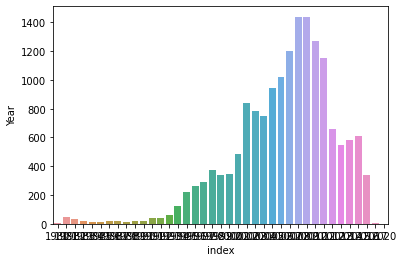

In [120]:
sns.barplot(data=game.Year.value_counts().reset_index().sort_values(by='index'), x='index', y='Year')

In [121]:
#중복치 제거(이름, 출시연도, 장르, 퍼블리셔가 같으면 같은 게임으로 취급/단, 판매량이 모두 같을 경우만 중복치로 취급)
game.drop_duplicates(inplace=True)
game=game.groupby(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], as_index=False).sum()

In [122]:
game['Total_Sales'] = game.iloc[:,-4:].sum(axis=1)

In [123]:
# 추가데이터셋 멜트
netmelt = net.melt(id_vars=['Year'], var_name='Nation', value_name='Internet_Use')
netmelt.Year = netmelt.Year.astype(int)

##***기본 문제 해결***

###1. 지역별 선호 장르

In [124]:
# 원활한 시각화를 위해 스케일을 줄인 전체 통계 생성
game_gen=game.copy()
game_gen['Total_Sales_Scaled'] = game_gen['Total_Sales']/1.5

In [125]:
#장르와 지역 데이터만 남긴 데이터셋 제작
game_locgen = game_gen.groupby('Genre')['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales', 'Total_Sales_Scaled'].sum().reset_index()

<ipython-input-125-b06b55d45d5d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  game_locgen = game_gen.groupby('Genre')['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales', 'Total_Sales_Scaled'].sum().reset_index()


In [126]:
# ANOVA 분석
# 귀무가설 : 각 지역에 따른 장르별 판매량은 차이가 없다.
# 대립가설 : 각 지역에 따른 장르별 판매량은 차이가 있다.
def anova(a, b, c):
  f_statistic, p_value = sc.f_oneway(a,b,c)
  if p_value > 0.05:
    print('통계적으로 유사하다. p_value =', p_value)
  else:
    print('통계적으로 차이가 있다. p_value =', round(p_value, 3))

anova(game_locgen.NA_Sales, game_locgen.EU_Sales, game_locgen.JP_Sales)

통계적으로 차이가 있다. p_value = 0.004


In [127]:
#시각화를 위해 멜트
game_locgen_clean = pd.melt(game_locgen, id_vars=['Genre'], var_name='Sales_Nation', value_name='Sales').sort_values(by='Sales', ascending=False)

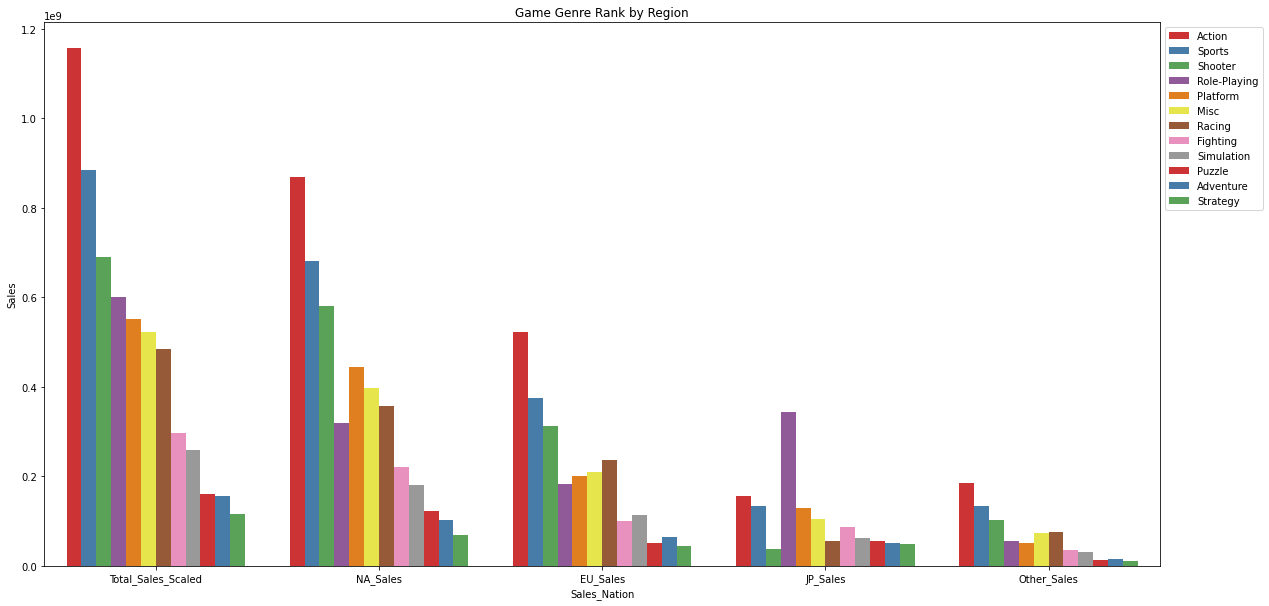

In [128]:
fig, ax = plt.subplots(figsize=(20, 10))
ax=sns.barplot(data=game_locgen_clean, hue='Genre', y='Sales', x='Sales_Nation', palette='Set1')
ax.set_title('Game Genre Rank by Region')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show();

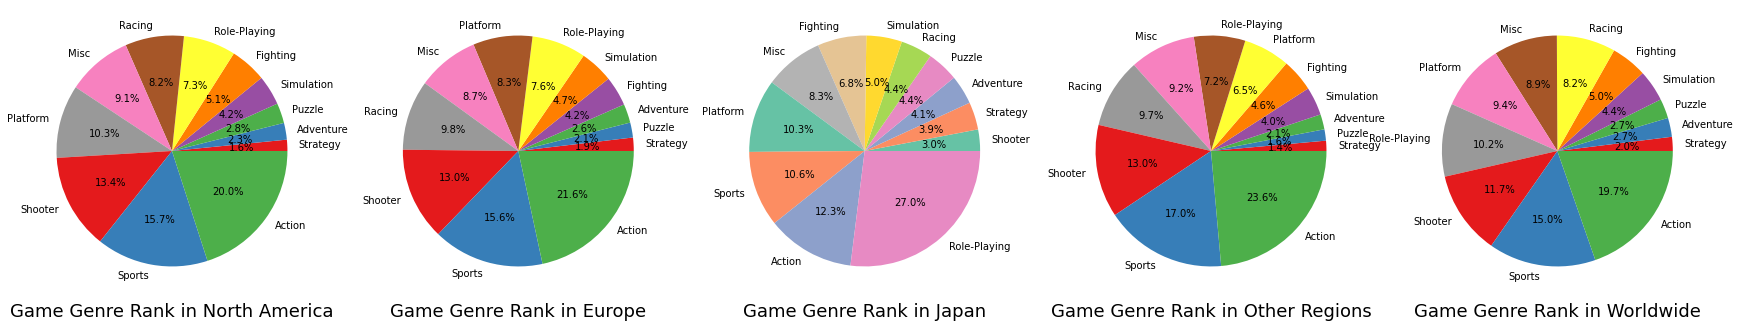

In [129]:
na = game_locgen_clean[game_locgen_clean.Sales_Nation=='NA_Sales'].sort_values(by='Sales')
eu = game_locgen_clean[game_locgen_clean.Sales_Nation=='EU_Sales'].sort_values(by='Sales')
jp = game_locgen_clean[game_locgen_clean.Sales_Nation=='JP_Sales'].sort_values(by='Sales')
other = game_locgen_clean[game_locgen_clean.Sales_Nation=='Other_Sales'].sort_values(by='Sales')
total = game_locgen_clean[game_locgen_clean.Sales_Nation=='Total_Sales_Scaled'].sort_values(by='Sales')
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(30, 10))
ax1.pie(data=na, labels='Genre', x='Sales', autopct='%.1f%%', colors=sns.color_palette('Set1'))
ax2.pie(data=eu, labels='Genre',x='Sales', autopct='%.1f%%', colors=sns.color_palette('Set1'))
ax3.pie(data=jp, labels='Genre',x='Sales', autopct='%.1f%%', colors=sns.color_palette('Set2'))
ax4.pie(data=other, labels='Genre',x='Sales', autopct='%.1f%%', colors=sns.color_palette('Set1'))
ax5.pie(data=total, labels='Genre',x='Sales', autopct='%.1f%%', colors=sns.color_palette('Set1'))
ax1.set_xlabel('Game Genre Rank in North America', fontsize=18)
ax2.set_xlabel('Game Genre Rank in Europe', fontsize=18)
ax3.set_xlabel('Game Genre Rank in Japan', fontsize=18)
ax4.set_xlabel('Game Genre Rank in Other Regions', fontsize=18)
ax5.set_xlabel('Game Genre Rank in Worldwide', fontsize=18)
plt.show();

In [130]:
#상위 3개만 있는 데이터프레임
bo3genre=pd.concat([
    game_locgen.nlargest(3, 'NA_Sales').iloc[:, [0, 1]],
    game_locgen.nlargest(3, 'EU_Sales').iloc[:, [0, 2]],
    game_locgen.nlargest(3, 'JP_Sales').iloc[:, [0, 3]],
    game_locgen.nlargest(3, 'Other_Sales').iloc[:, [0, 4]],
    game_locgen.nlargest(3, 'Total_Sales_Scaled').iloc[:, [0, 5]]
])
bo3genremelt=pd.melt(bo3genre, id_vars=['Genre'], var_name='Sales_Nation', value_name='Sales')
bo3genremelt.loc[bo3genremelt['Sales_Nation'] != 'Total'].sort_values(by='Sales', ascending=False, inplace=True)

In [131]:
#하위 3개만 있는 데이터프레임
wo3genre=pd.concat([
    game_locgen.nsmallest(3, 'NA_Sales').iloc[:, [0, 1]],
    game_locgen.nsmallest(3, 'EU_Sales').iloc[:, [0, 2]],
    game_locgen.nsmallest(3, 'JP_Sales').iloc[:, [0, 3]],
    game_locgen.nsmallest(3, 'Other_Sales').iloc[:, [0, 4]],
    game_locgen.nsmallest(3, 'Total_Sales_Scaled').iloc[:, [0, 5]]
])
wo3genremelt=pd.melt(wo3genre, id_vars=['Genre'], var_name='Sales_Nation', value_name='Sales')
wo3genremelt.loc[wo3genremelt['Sales_Nation'] != 'Total'].sort_values(by='Sales', ascending=True, inplace=True)

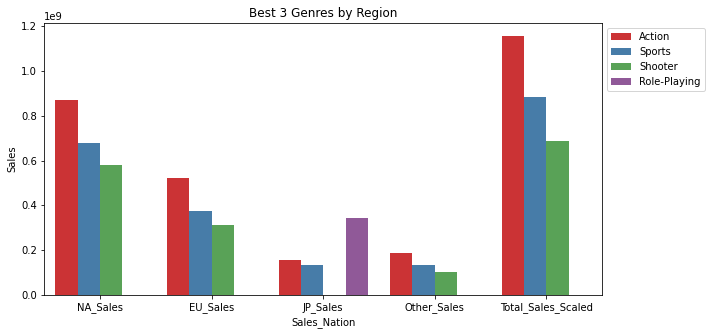

In [132]:
fig, ax = plt.subplots(figsize=(10, 5))
ax=sns.barplot(data=bo3genremelt, hue='Genre', y='Sales', x='Sales_Nation', palette='Set1')
ax.set_title('Best 3 Genres by Region')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show();

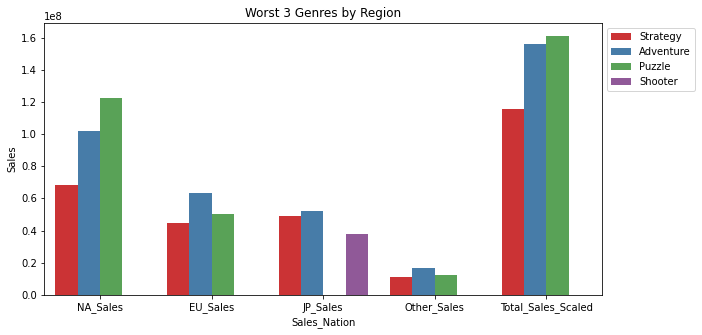

In [133]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.barplot(data=wo3genremelt, hue='Genre', y='Sales', x='Sales_Nation', palette='Set1')
ax.set_title('Worst 3 Genres by Region')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show();

In [134]:
#플랫폼과 지역 데이터만 남긴 데이터셋 제작
game_locpla = game_gen.groupby('Platform')['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales', 'Total_Sales_Scaled'].sum().reset_index()

<ipython-input-134-710f5ef372ff>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  game_locpla = game_gen.groupby('Platform')['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales', 'Total_Sales_Scaled'].sum().reset_index()


In [135]:
# ANOVA 분석
# 귀무가설 : 각 지역에 따른 플랫폼별 판매량은 차이가 없다.
# 대립가설 : 각 지역에 따른 플랫폼별 판매량은 차이가 있다.
def anova(a, b, c):
  f_statistic, p_value = sc.f_oneway(a,b,c)
  if p_value > 0.05:
    print('통계적으로 유사하다. p_value =', p_value)
  else:
    print('통계적으로 차이가 있다. p_value =', round(p_value, 3))

anova(game_locpla.NA_Sales, game_locpla.EU_Sales, game_locpla.JP_Sales)

통계적으로 차이가 있다. p_value = 0.007


In [136]:
#시각화를 위해 멜트
game_locpla_clean = pd.melt(game_locpla, id_vars=['Platform'], var_name='Sales_Nation', value_name='Sales').sort_values(by='Sales', ascending=False)

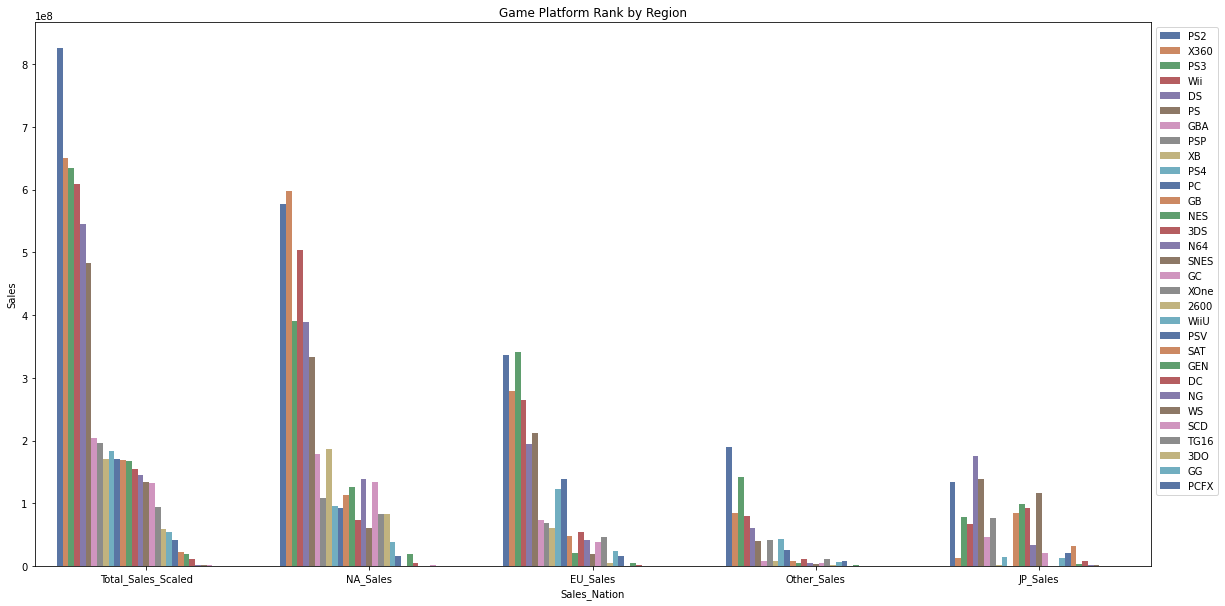

In [137]:
fig, ax = plt.subplots(figsize=(20, 10))
ax=sns.barplot(data=game_locpla_clean, hue='Platform', y='Sales', x='Sales_Nation', palette='deep')
ax.set_title('Game Platform Rank by Region')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show();

### 연도별 게임 트렌드

In [138]:
trend = game[['Year', 'Platform', 'Genre', 'Total_Sales']]
# 연도로 봤을때 무의미한 데이터 제거
trend = trend[trend.Year < 2017]
# 플랫폼별 정제
trend_platform = trend.groupby(['Year','Platform'])['Total_Sales'].sum().reset_index()
trend_platform_pivot = trend_platform.pivot(index='Year', columns='Platform', values=['Total_Sales']).fillna(0)
trend_platform = trend_platform_pivot.unstack().reset_index().rename(columns={0:'Total_Sales'})
trend_platform = trend_platform[['Platform', 'Year', 'Total_Sales']]
# 장르별 정제
trend_genre = trend.groupby(['Year','Genre']).count().reset_index()
trend_genre_pivot = trend_genre.pivot(index='Year', columns='Genre', values=['Total_Sales']).fillna(0)
trend_genre = trend_genre_pivot.unstack().reset_index().rename(columns={0:'Total_Sales'})
trend_genre = trend_genre[['Genre', 'Year', 'Total_Sales']]
# 기타 장르 제거
trend_genre = trend_genre[trend_genre.Genre != 'Misc'].reset_index()

In [139]:
#Normalize 함수
def ratio_check(df):
  yt = df.groupby('Year')['Total_Sales'].sum().reset_index()
  df['Sales_Ratio'] = ''
  for i in range(len(df)):
    year = df.Year[i]
    df['Sales_Ratio'][i] = df.Total_Sales[i]/yt[yt.Year == year].Total_Sales.iloc[0]

In [140]:
# 해당연도에서 차지하는 비율인 행 생성
ratio_check(trend_platform)
ratio_check(trend_genre)

<ipython-input-139-d1b9b8cb7e01>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_Ratio'][i] = df.Total_Sales[i]/yt[yt.Year == year].Total_Sales.iloc[0]
<ipython-input-139-d1b9b8cb7e01>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_Ratio'][i] = df.Total_Sales[i]/yt[yt.Year == year].Total_Sales.iloc[0]


In [141]:
# X^2 검정 함수 생성
def chisqu(df):
  table = pd.crosstab(df.Year, df.Sales_Ratio)
  chi2, p, dof, expected = sc.chi2_contingency(table)
  if p > 0.05:
    print('통계적으로 유의하다. p_value =', p)
  else:
    print('통계적으로 유의성이 없다. p_value =', round(p, 3))

In [142]:
# 귀무가설 : 각 연도별로 가장 높은 판매량을 기록한 플랫폼은 통계적으로 유의하다.
# 대립가설 : 각 연도별로 가장 높은 판매량을 기록한 플랫폼은 통계적으로 유의하지 않다.
chisqu(trend_platform)

통계적으로 유의하다. p_value = 0.4578418550610162


In [143]:
# 귀무가설 : 각 연도별로 가장 높은 판매량을 기록한 장르는 통계적으로 유의하다.
# 대립가설 : 각 연도별로 가장 높은 판매량을 기록한 장르는 통계적으로 유의하지 않다.
chisqu(trend_genre)

통계적으로 유의성이 없다. p_value = 0.0


In [144]:
# 플랫폼 상위랭크 필터(2016년 기준)
platform_count = trend_platform[trend_platform.Year == 2016]
top_platforms = platform_count.nlargest(8, 'Total_Sales').Platform.tolist()
trend_platform_top = trend_platform[trend_platform['Platform'].isin(top_platforms)].sort_values(by='Total_Sales')

In [145]:
# 장르별 상위랭크 필터(2016년 기준)
genre_count = trend_genre[trend_genre.Year == 2016]
top_genres = genre_count.nlargest(5, 'Total_Sales').Genre.tolist()
trend_genre_top = trend_genre[trend_genre['Genre'].isin(top_genres)].sort_values(by='Total_Sales')

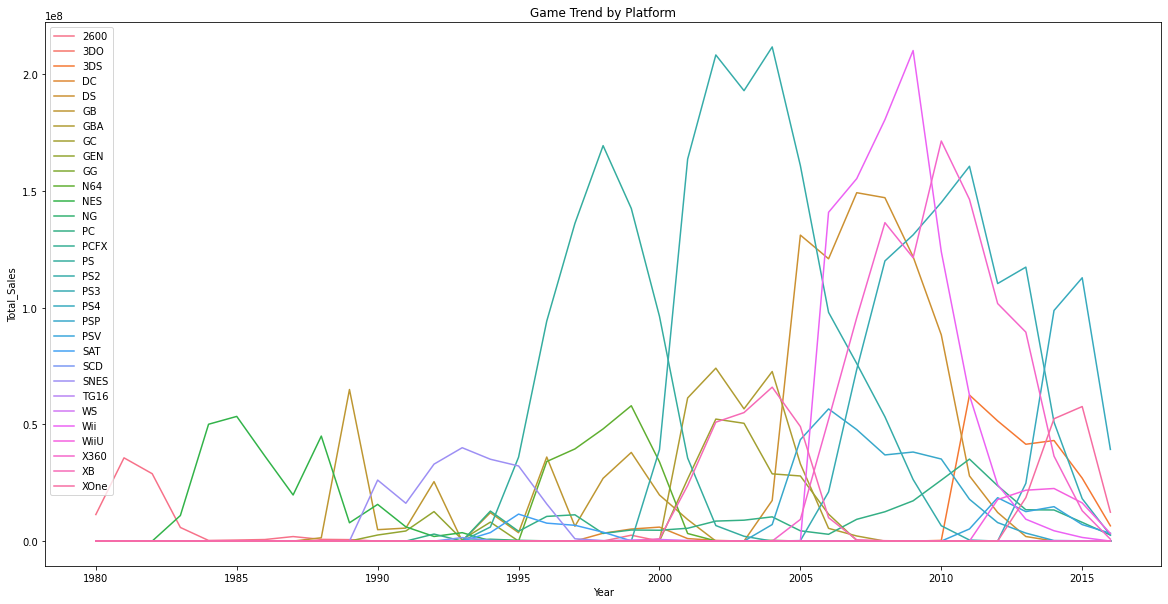

In [146]:
# 플랫폼 단순 판매량 시각화
fig, ax = plt.subplots(figsize=(20, 10))
ax=sns.lineplot(data=trend_platform, x='Year', y='Total_Sales', hue='Platform')
ax.set_title('Game Trend by Platform')
plt.legend(loc='best')
plt.show();

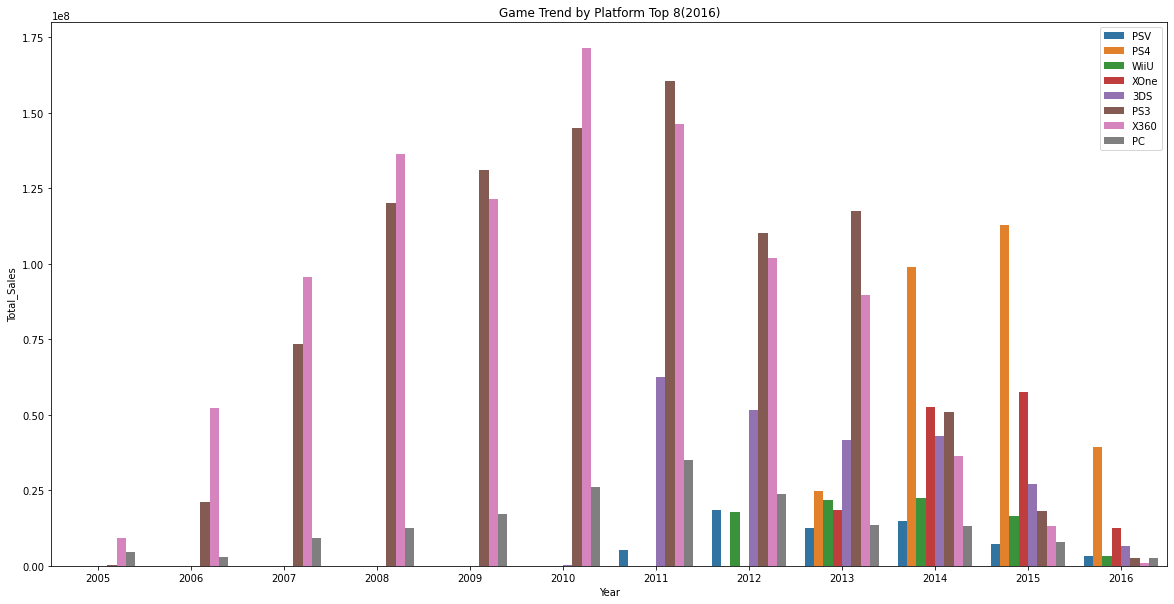

In [147]:
# 플랫폼 단순 판매량 상위권 시각화
fig, ax = plt.subplots(figsize=(20, 10))
trend_platform_top_ = trend_platform_top[trend_platform_top.Year >= 2005]
ax=sns.barplot(data=trend_platform_top_, x='Year', y='Total_Sales', hue='Platform')
ax.set_title('Game Trend by Platform Top 8(2016)')
plt.legend(loc='best')
plt.show();

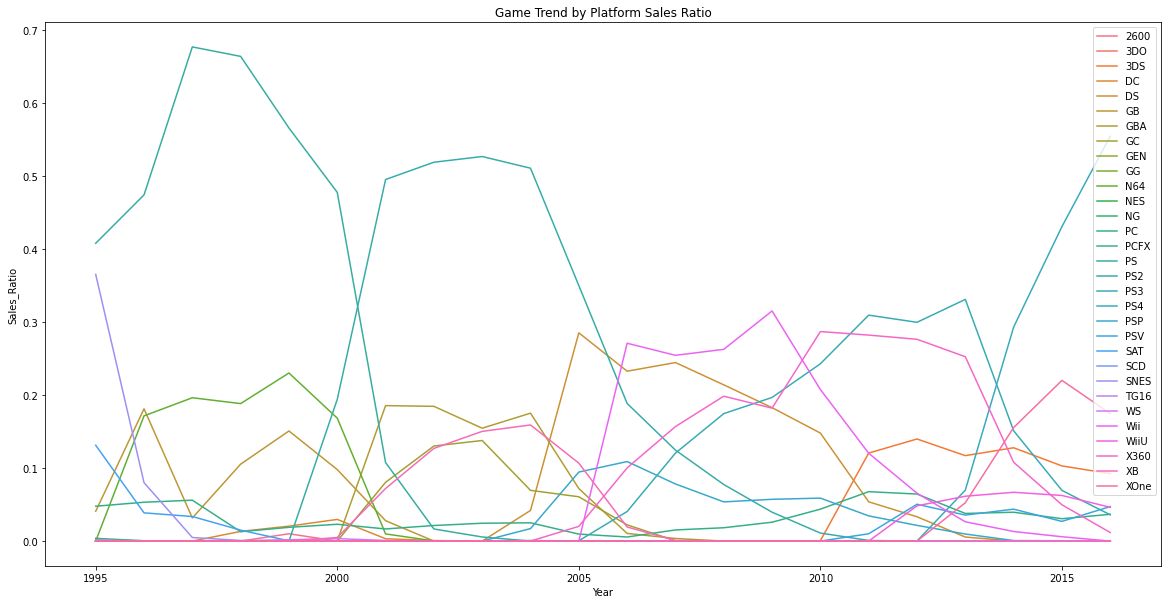

In [148]:
# 플랫폼 판매량 비율 시각화
fig, ax = plt.subplots(figsize=(20, 10))
trend_platform_ = trend_platform[trend_platform.Year >= 1995]
ax=sns.lineplot(data=trend_platform_, x='Year', y='Sales_Ratio', hue='Platform')
ax.set_title('Game Trend by Platform Sales Ratio')
plt.legend(loc='best')
plt.show();

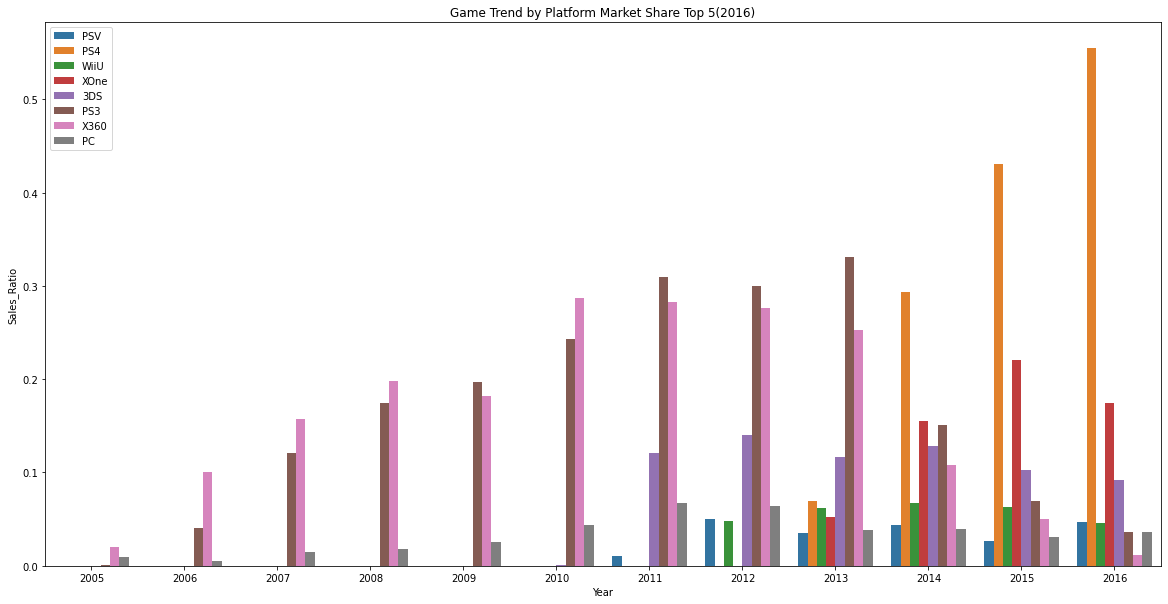

In [149]:
# 플랫폼 판매량 비율 상위권 시각화
fig, ax = plt.subplots(figsize=(20, 10))
trend_platform_top_ratio = trend_platform_top[trend_platform_top.Year >= 2005]
ax=sns.barplot(data=trend_platform_top_ratio, x='Year', y='Sales_Ratio', hue='Platform')
ax.set_title('Game Trend by Platform Market Share Top 5(2016)')
plt.legend(loc='best')
plt.show();

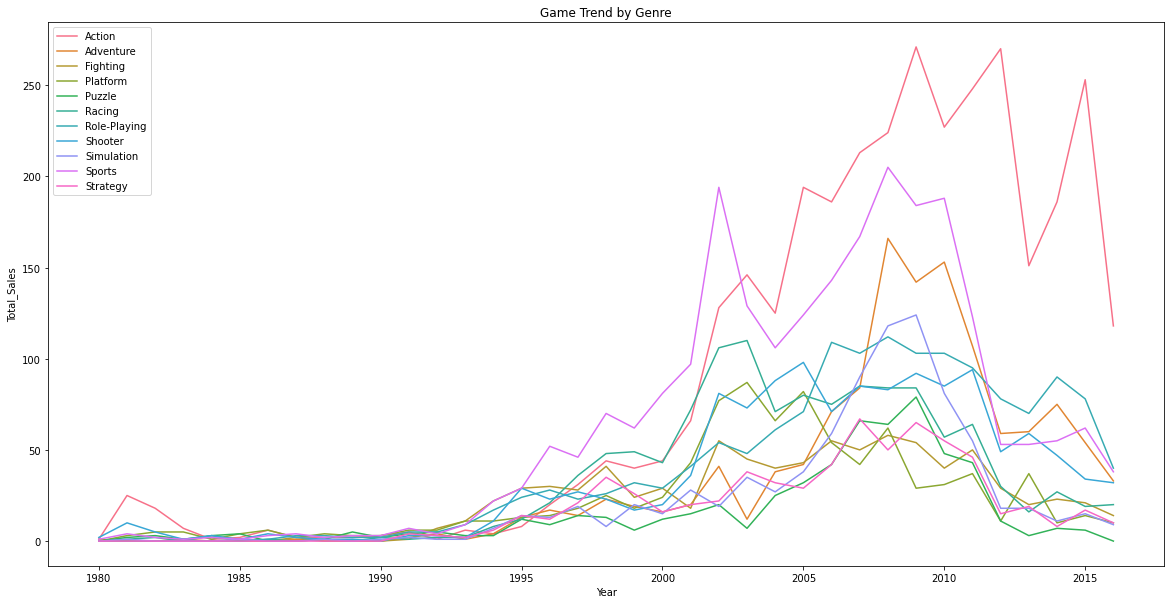

In [150]:
# 장르 단순 판매량 시각화
fig, ax = plt.subplots(figsize=(20, 10))
ax=sns.lineplot(data=trend_genre, x='Year', y='Total_Sales', hue='Genre')
ax.set_title('Game Trend by Genre')
plt.legend(loc='best')
plt.show();

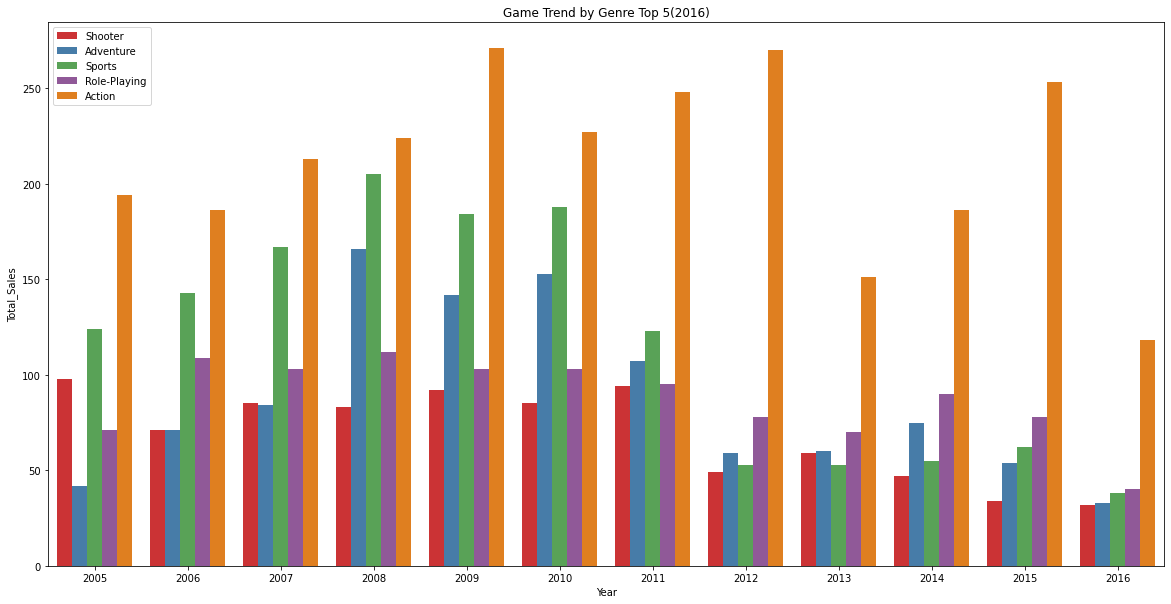

In [151]:
# 장르 단순 판매량 상위권 시각화
fig, ax = plt.subplots(figsize=(20, 10))
trend_genre_top_ = trend_genre_top[trend_genre_top.Year >= 2005]
ax=sns.barplot(data=trend_genre_top_, x='Year', y='Total_Sales', hue='Genre', palette='Set1')
ax.set_title('Game Trend by Genre Top 5(2016)')
plt.legend(loc='best')
plt.show();

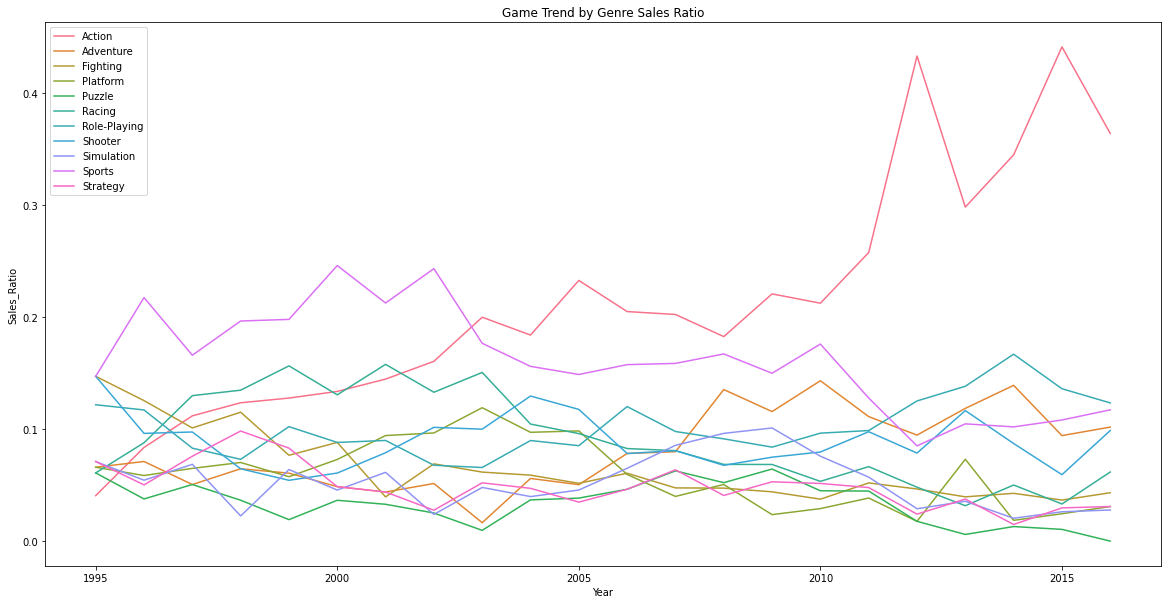

In [152]:
# 장르 판매량 비율 시각화
fig, ax = plt.subplots(figsize=(20, 10))
trend_genre_ = trend_genre[trend_genre.Year >= 1995]
ax=sns.lineplot(data=trend_genre_, x='Year', y='Sales_Ratio', hue='Genre')
ax.set_title('Game Trend by Genre Sales Ratio')
plt.legend(loc='best')
plt.show();

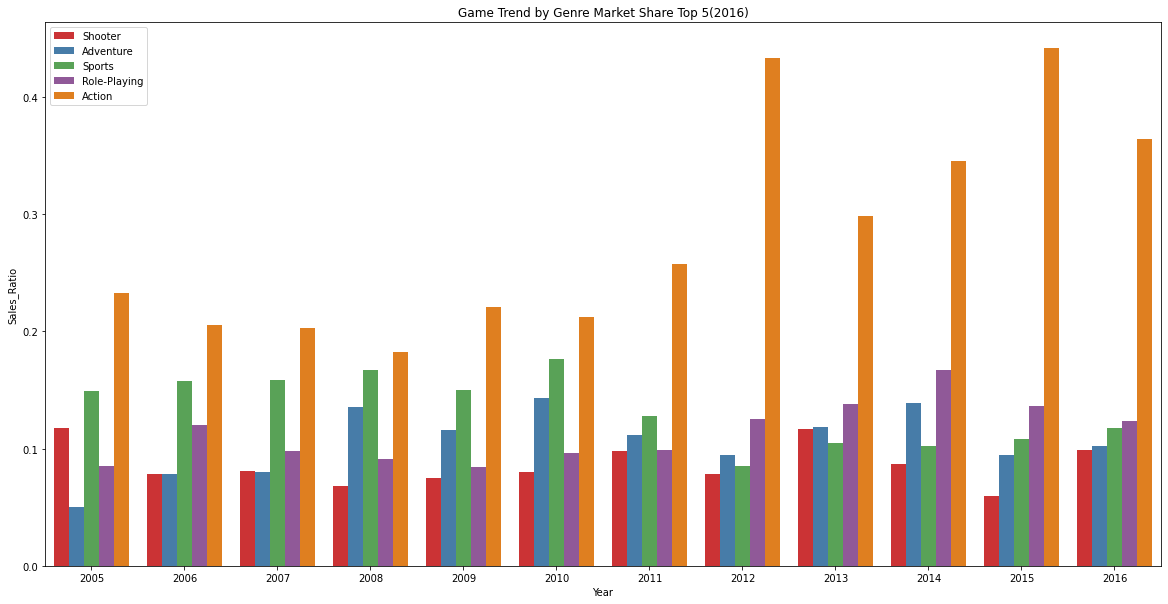

In [153]:
# 장르 단순 판매량 상위권 시각화
fig, ax = plt.subplots(figsize=(20, 10))
trend_genre_top_Ratio = trend_genre_top[trend_genre_top.Year >= 2005]
ax=sns.barplot(data=trend_genre_top_Ratio, x='Year', y='Sales_Ratio', hue='Genre', palette='Set1')
ax.set_title('Game Trend by Genre Market Share Top 5(2016)')
plt.legend(loc='best')
plt.show();

### 인기가 많은 게임

In [154]:
# 단순 판매량 기준 인기 게임 확인
popgame1 = game.groupby(['Name', 'Year', 'Genre'])['Total_Sales','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'].sum().reset_index()
popgame = popgame1.copy()
popgame['Name'] = popgame['Name'] + '(' + popgame['Year'].astype(str) + ')'
popgame.drop(['Year', 'Genre'], axis=1, inplace=True)

<ipython-input-154-b50672f8e6f1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  popgame1 = game.groupby(['Name', 'Year', 'Genre'])['Total_Sales','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'].sum().reset_index()


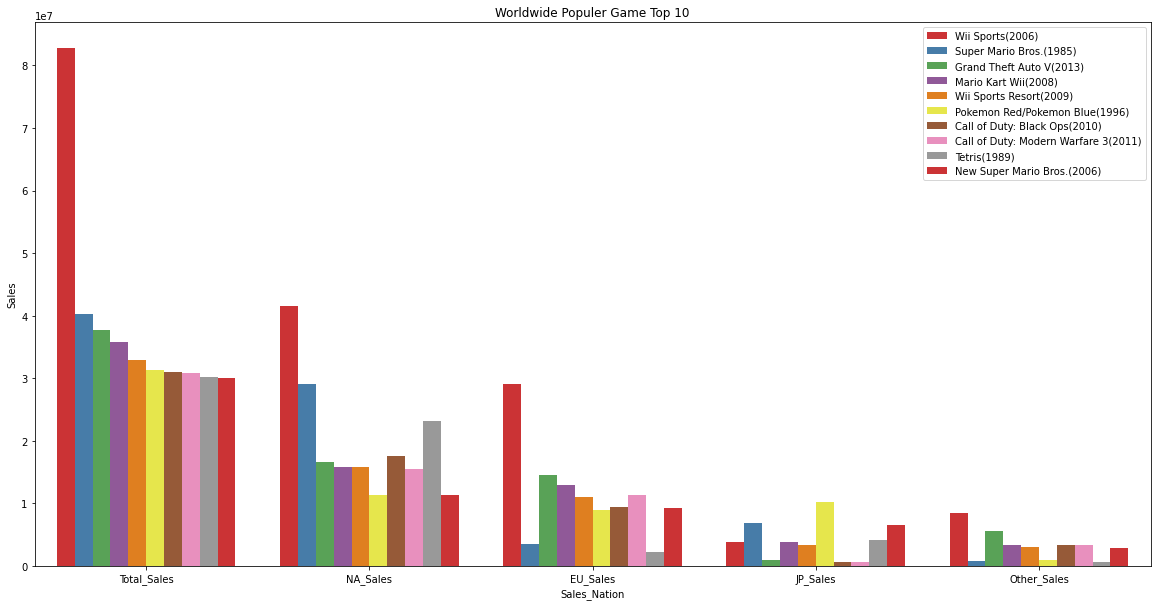

In [155]:
topgame = popgame.sort_values(by='Total_Sales', ascending=False)
topgame_top10 = topgame.head(10)
topgame_melt = pd.melt(topgame_top10, id_vars=['Name'], var_name='Sales_Nation', value_name='Sales')
fig, ax = plt.subplots(figsize=(20, 10))
ax=sns.barplot(data=topgame_melt, x='Sales_Nation', y='Sales', hue='Name', palette='Set1')
ax.set_title('Worldwide Populer Game Top 10')
plt.legend(loc='best')
plt.show();

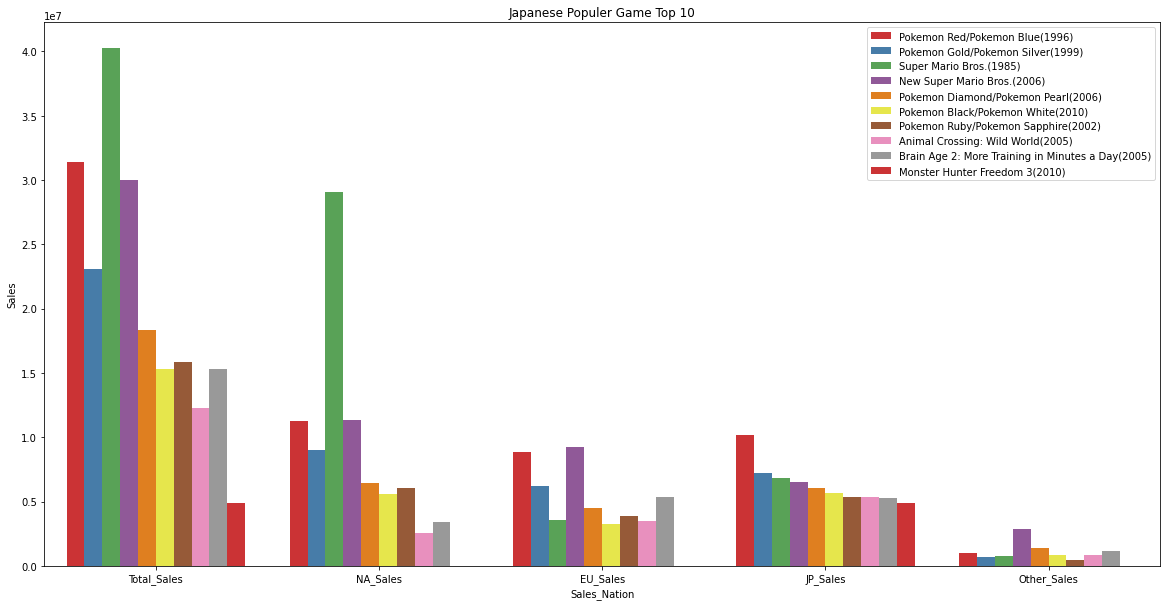

In [156]:
jpgame = popgame.sort_values(by='JP_Sales', ascending=False)
jpgame_top10 = jpgame.head(10)
jpgame_melt = pd.melt(jpgame_top10, id_vars=['Name'], var_name='Sales_Nation', value_name='Sales')
fig, ax = plt.subplots(figsize=(20, 10))
ax=sns.barplot(data=jpgame_melt, x='Sales_Nation', y='Sales', hue='Name', palette='Set1')
ax.set_title('Japanese Populer Game Top 10')
plt.legend(loc='best')
plt.show();

In [157]:
gybysales = popgame.iloc[:,:2]
gySales = gybysales.drop(['Name'], axis=1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

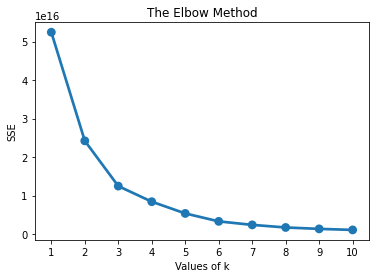

In [158]:
# 엘보우 확인
sse = {}
for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(gySales)
  sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [159]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(gySales)
    silhouette_scores.append(silhouette_score(gySales, labels))
    
# Silhouette Method를 이용하여 최적의 클러스터 수 선택
print('최적의 클러스터 수:', np.argmax(silhouette_scores) + 2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

최적의 클러스터 수: 2


In [160]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=2, max_iter=50, random_state=42)
kmeans.fit(gySales)

# 게임별 클러스터 지정
cluster_labels = kmeans.labels_
gybysales_k = gybysales.assign(Cluster = cluster_labels)
popgame1 = popgame1.assign(Cluster = cluster_labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [161]:
gbsyear = popgame1.groupby(['Year', 'Cluster'])['Total_Sales'].sum().reset_index()
gbsyear = gbsyear[gbsyear.Year < 2016]
gbsgenre = popgame1.groupby(['Genre', 'Cluster'])['Total_Sales'].sum().reset_index()
# Normalize 함수
def kratio(df):
  yt = df.groupby(df.columns[0])['Total_Sales'].sum().reset_index()
  df['Sales_Ratio'] = ''
  for i in range(len(df)):
    col = df.iloc[i,0]
    df['Sales_Ratio'][i] = df.Total_Sales[i]/yt[yt.iloc[:,0] == col].Total_Sales.iloc[0]
kratio(gbsyear)
kratio(gbsgenre)
# 시각화를 위한 정제
gbsyear = gbsyear.pivot(index='Year', columns='Cluster', values=['Sales_Ratio']).fillna(0).unstack().reset_index()
gbsgenre = gbsgenre.pivot(index='Genre', columns='Cluster', values=['Sales_Ratio']).fillna(0).unstack().reset_index()

<ipython-input-161-3ccab287a34c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_Ratio'][i] = df.Total_Sales[i]/yt[yt.iloc[:,0] == col].Total_Sales.iloc[0]
<ipython-input-161-3ccab287a34c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_Ratio'][i] = df.Total_Sales[i]/yt[yt.iloc[:,0] == col].Total_Sales.iloc[0]


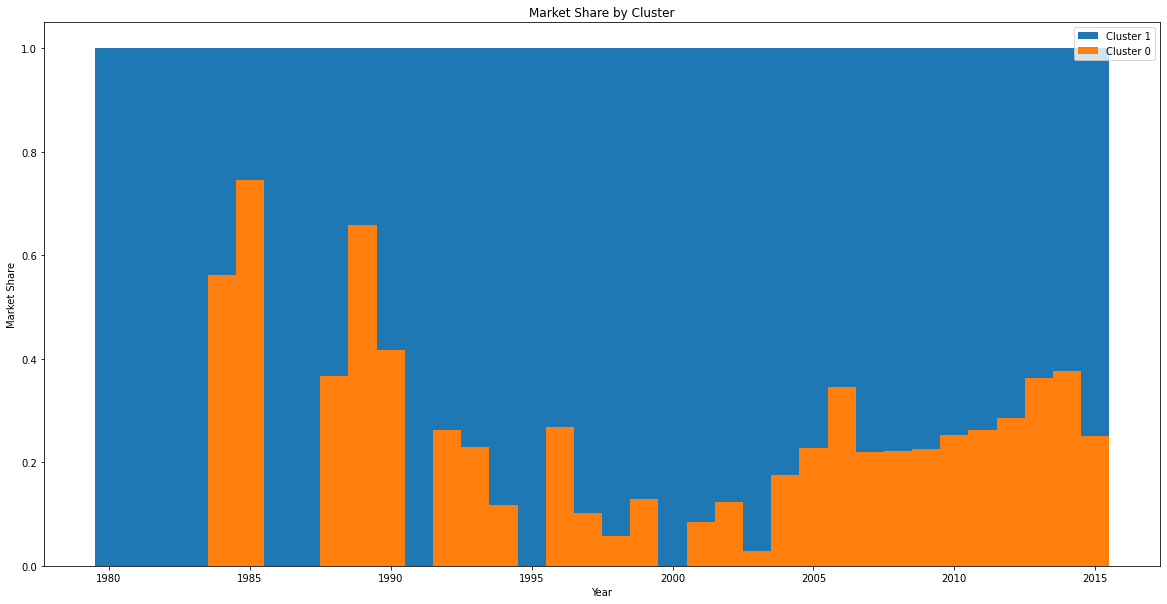

In [162]:
Ycluster0 = gbsyear[gbsyear['Cluster'] == 0]
Ycluster1 = gbsyear[gbsyear['Cluster'] == 1]
# 막대그래프 그리기
plt.subplots(figsize=(20, 10))
plt.bar(Ycluster1['Year'], Ycluster1[0], width=1, align='center', bottom=Ycluster0[0], label='Cluster 1')
plt.bar(Ycluster0['Year'], Ycluster0[0], width=1, align='center', label='Cluster 0')
plt.xlabel('Year')
plt.ylabel('Market Share')
plt.title('Market Share by Cluster')
plt.legend()
plt.show();

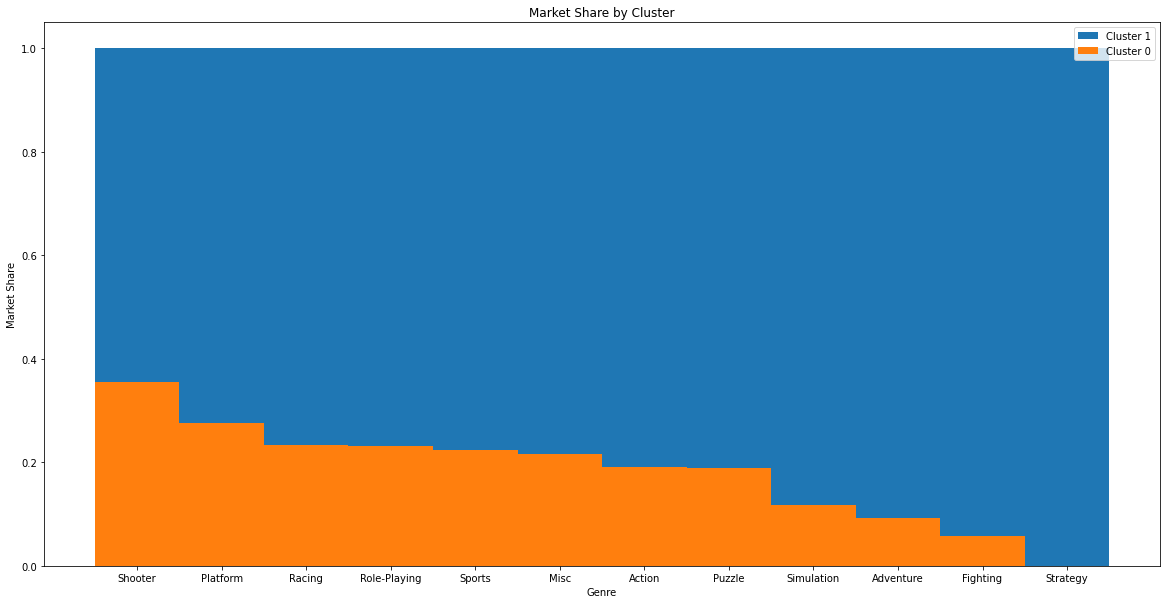

In [163]:
Gcluster0 = gbsgenre[gbsgenre['Cluster'] == 0].sort_values(by=0, ascending=False)
Gcluster1 = gbsgenre[gbsgenre['Cluster'] == 1].sort_values(by=0, ascending=True)
# 막대그래프 그리기
plt.subplots(figsize=(20, 10))
plt.bar(Gcluster1['Genre'], Gcluster1[0], width=1, align='center', bottom=Gcluster0[0], label='Cluster 1')
plt.bar(Gcluster0['Genre'], Gcluster0[0], width=1, align='center', label='Cluster 0')
plt.xlabel('Genre')
plt.ylabel('Market Share')
plt.title('Market Share by Cluster')
plt.legend()
plt.show();

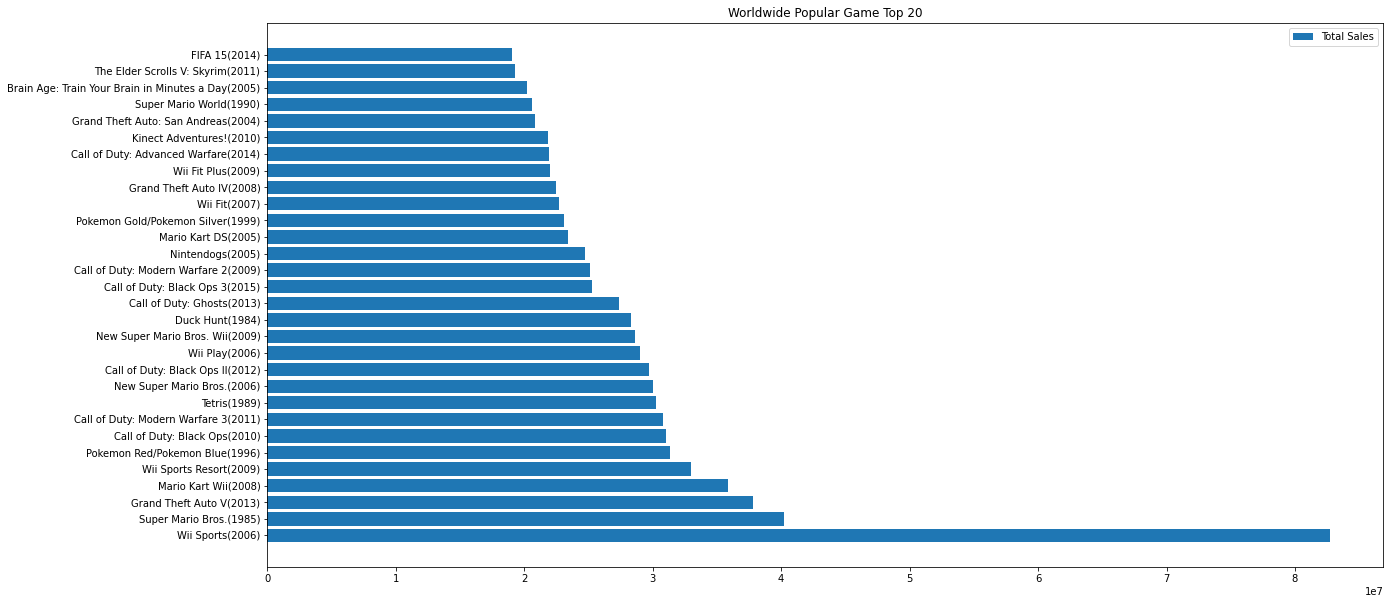

In [164]:
popgamegenre = popgame1.copy()
popgamegenre['Name'] = popgamegenre['Name'] + '(' + popgamegenre['Year'].astype(str) + ')'
popgamegenre.drop(['Year'], axis=1, inplace=True)
totalpop = popgamegenre.sort_values(by='Total_Sales', ascending=False).head(30)
Shooterpop = popgamegenre[(popgamegenre.Genre == 'Shooter') & (popgamegenre.Cluster == 0)].sort_values(by='Total_Sales', ascending=False).head(10)
Platformpop = popgamegenre[(popgamegenre.Genre == 'Platform') & (popgamegenre.Cluster == 0)].sort_values(by='Total_Sales', ascending=False).head(10)
Racingpop = popgamegenre[(popgamegenre.Genre == 'Racing') & (popgamegenre.Cluster == 0)].sort_values(by='Total_Sales', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(y=totalpop['Name'], width=totalpop['Total_Sales'], label='Total Sales')
ax.set_title('Worldwide Popular Game Top 20')
ax.legend(loc='best')
plt.show();

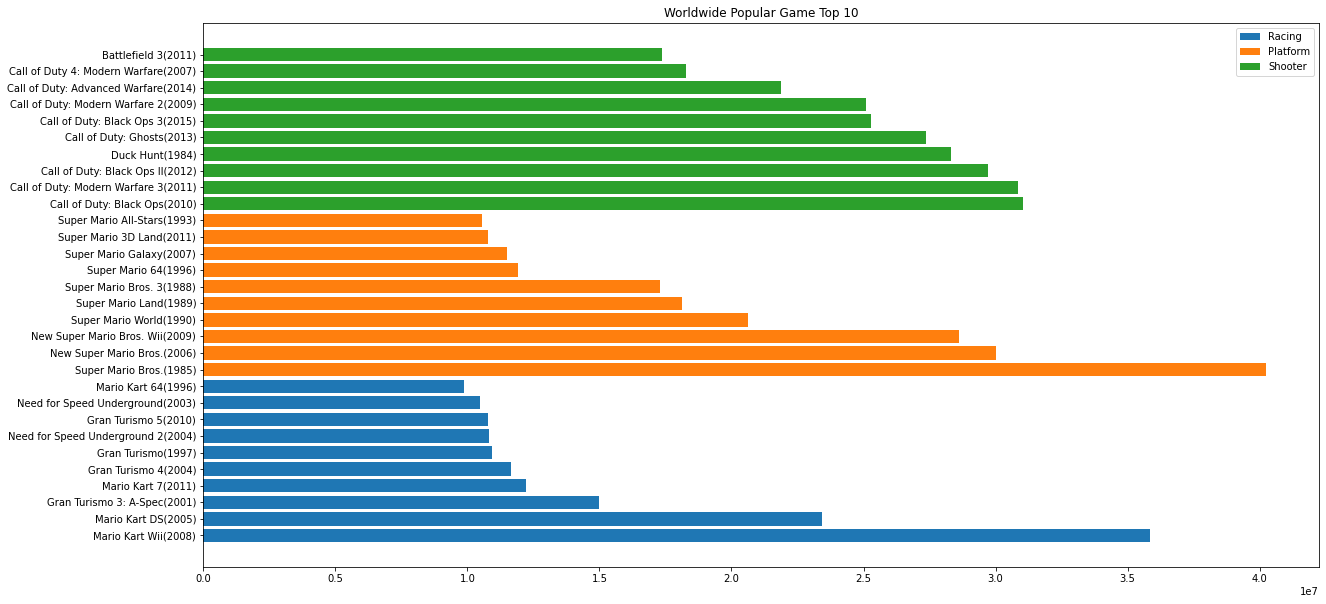

In [165]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(y=Racingpop['Name'], width=Racingpop['Total_Sales'], label='Racing')
ax.barh(y=Platformpop['Name'], width=Platformpop['Total_Sales'], label='Platform')
ax.barh(y=Shooterpop['Name'], width=Shooterpop['Total_Sales'], label='Shooter')
ax.set_title('Worldwide Popular Game Top 10')
ax.legend(loc='best')
plt.show();

## 추가 인사이트

### 장르에 따른 분기 분석

In [166]:
# 정규화를 위한 정제
yearplat = game.value_counts(['Year', 'Platform']).reset_index()
yearpl = yearplat.pivot(index='Year', columns='Platform', values=[0]).fillna(0).reset_index()
ypchan = yearpl.drop(['Year'], axis=1)

<ipython-input-166-d26e35bca54f>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ypchan = yearpl.drop(['Year'], axis=1)


In [167]:
# 정규화
scaler = StandardScaler()
yp_scaled = scaler.fit_transform(ypchan)

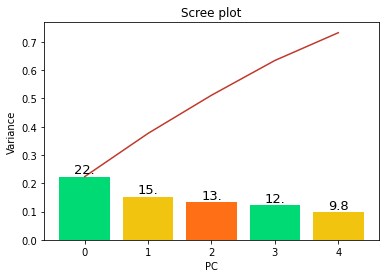

In [168]:
# PCA 진행
pca = PCA(5) 
pca.fit(yp_scaled)
yp_pca = pca.transform(yp_scaled)
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
scree_plot(pca)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

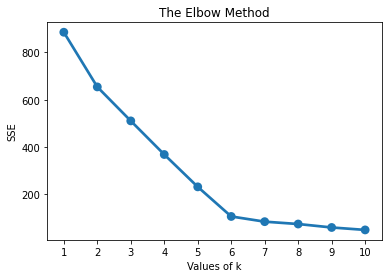

In [169]:
# 엘보우 확인
sse = {}
for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(yp_pca)
  sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [170]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(yp_pca)
    silhouette_scores.append(silhouette_score(yp_pca, labels))
    
# Silhouette Method를 이용하여 최적의 클러스터 수 선택
print('최적의 클러스터 수:', np.argmax(silhouette_scores) + 2)

최적의 클러스터 수: 6


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [171]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=6, max_iter=50, random_state=42)
kmeans.fit(yp_pca)

# 게임별 클러스터 지정
cluster_labels = kmeans.labels_
yp_k = yearpl.assign(Cluster = cluster_labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [172]:
yp_k = yp_k.melt(id_vars=['Year', 'Cluster'])
yp_k = yp_k[yp_k.value != 0.0]

<AxesSubplot:xlabel='Year'>

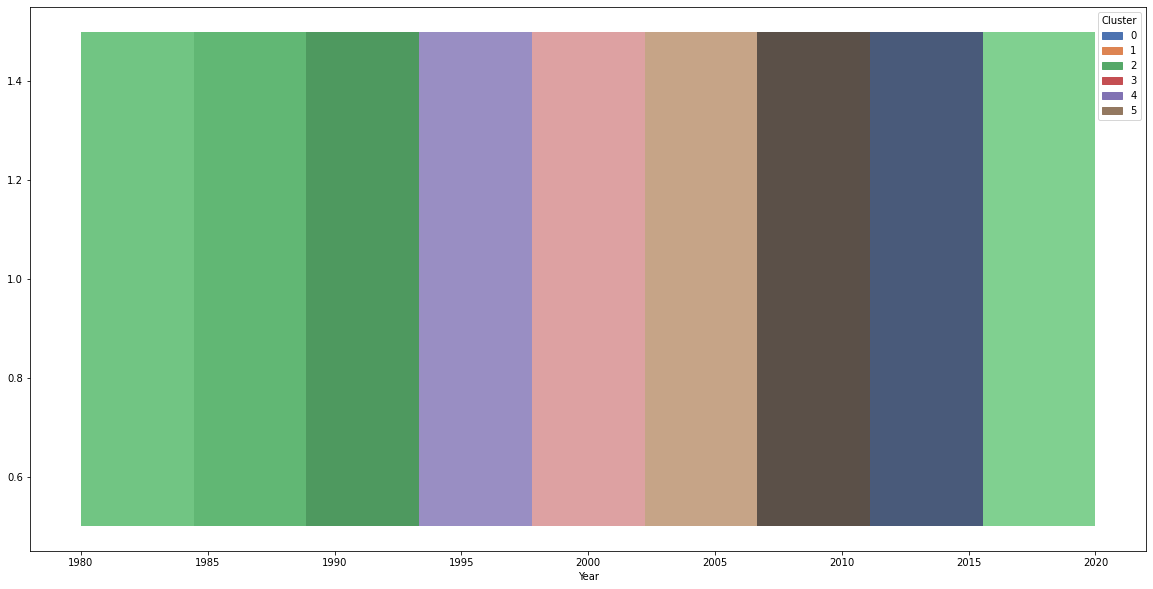

In [173]:
plt.subplots(figsize=(20, 10))
sns.histplot(data= yp_k, x='Year', y=1, hue='Cluster', palette='deep')

<AxesSubplot:xlabel='Year', ylabel='value'>

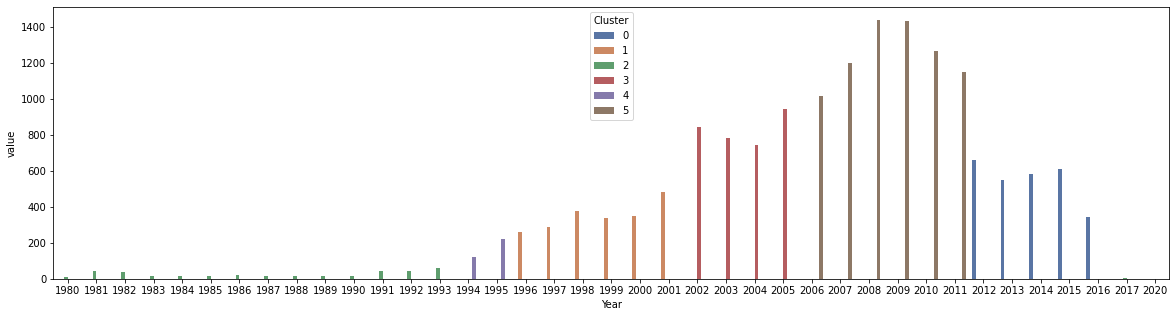

In [174]:
yp_kg = yp_k.groupby(['Year','Cluster'])['value'].sum().reset_index()
plt.subplots(figsize=(20, 5))
sns.barplot(data=yp_kg, x='Year', y='value', hue='Cluster', palette='deep')

### PC 이식을 진행해야하는 이유

In [175]:
gamepopclu = game.merge(popgame1.loc[:,['Name','Cluster']], on='Name', how='outer')

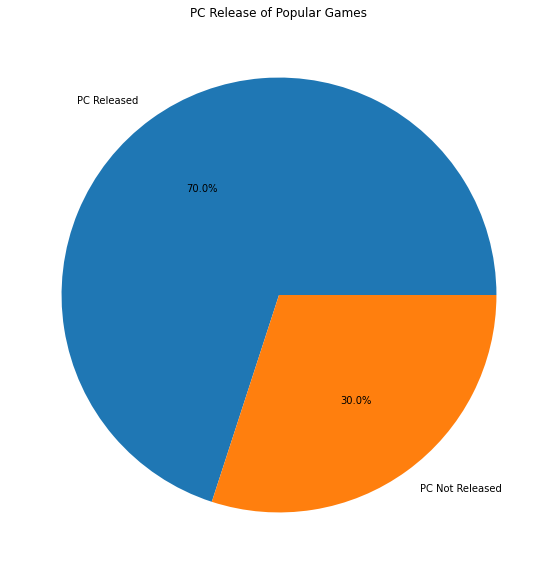

In [176]:
#슈팅 게임
mostpopgame = gamepopclu[(gamepopclu.Genre == 'Shooter') & (gamepopclu.Cluster == 0)]
popgamepc = mostpopgame[mostpopgame.Platform == 'PC']
popgamenpc = [x for x in mostpopgame.Name.unique() if x not in mostpopgame[mostpopgame.Platform == 'PC'].Name.unique()]
pcratio = [popgamepc.shape[0], len(popgamenpc)]
plt.subplots(figsize=(20, 10))
labels = ['PC Released', 'PC Not Released']
plt.title('PC Release of Popular Games')
plt.pie(pcratio, labels=labels, autopct='%.1f%%')
plt.show()

In [177]:
net_YU = netmelt.groupby('Year')['Internet_Use'].mean().reset_index()
trend_PC = trend_platform[trend_platform.Platform == 'PC']
pcnet = pd.merge(net_YU, trend_PC, on='Year')

In [178]:
# 클러스터가 분리되었고, 2012년의 데이터가 부자연스럽게 감소하는 것으로 보아, 부자연스러운 데이터라 판단, 제거.
pcnet = pcnet[pcnet.Year < 2012]

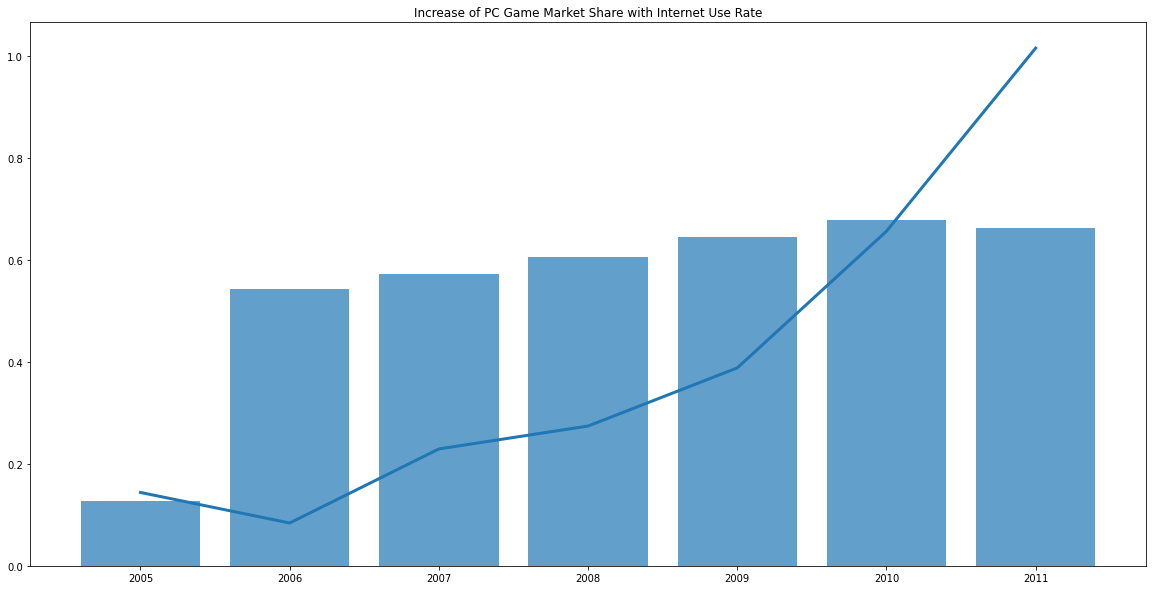

In [179]:
plt.subplots(figsize=(20, 10))
plt.bar(pcnet.Year, pcnet.Internet_Use, alpha=0.7)
plt.plot(pcnet.Year, pcnet.Sales_Ratio*15, linewidth=3, zorder=10)
plt.title('Increase of PC Game Market Share with Internet Use Rate')
plt.show()